# Thresholding
In this notebook, I extract orbits for a signle chromosome in all 4 cell lines.
In order to do this, I
first I perform the most lates normalization method that I have found to be most useful: a combination of gaussian normalization, SCN and pearson correlation, in the same order mentioned. The normalized results are of type ```pearson(scn(gaussian(graph)))```.

Then I threshold the results by setting pearson values larger than 0 to 1 and the rest to 0.
In order to extract graphlets, I used the *orca* package in R. the script `./rscript.r`
read a binary thresholded matrix representing an unweighted graph and outputs orbtis 0 
through 72 for each node in the network.
After thredholding the matrices, I save them so that orca in R can read it and extract orbits.

By repeating the procedure explained above for all 23 chromosomes, we will have graphlets
for all contact maps.

In [207]:
import numpy as np
import cv2
from utility import *
import matplotlib.pyplot as plt
from iced import normalization
from iced import filter
import os
%load_ext autoreload
%autoreload 2
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 9)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Populating the interactive namespace from numpy and matplotlib


## Initiating matrices

In [208]:
chr1 = 22
chr2 = chr1
print "chromosome 1: %s, chromosome 2: %s"%(chr1, chr2)
#print observed_mit_original.shape

mit = readMat("../data/extracted_all_contact_MIT/chr_%02d_%02d_500kb.mat"%\
              (chr1, chr2), "\t")
call4 = readMat("../data/extracted_all_contact_call4/chr_%02d_%02d_500kb.mat"%\
                (chr1, chr2), "\t")
rl = readMat("../data/extracted_all_contact_RL/chr_%02d_%02d_500kb.mat"%(chr1, chr2), "\t")

all = readMat("../data/extracted_all_contact_ALL/chr_%02d_%02d_500kb.mat"%(chr1, chr2), "\t")

#There are some blank rows and columns in the matrix. let's remove them.
blankRows0, blankCols0 = getBlankRowsAndColumns(mit)
blankRows1, blankCols1 = getBlankRowsAndColumns(all)
blankRows2, blankCols2 = getBlankRowsAndColumns(rl)
blankRows3, blankCols3 = getBlankRowsAndColumns(call4)
blankRows = Set([])
blankCols = Set([])
blankRows.update(blankRows0)
blankRows.update(blankRows1)
blankRows.update(blankRows2)
blankRows.update(blankRows3)
blankCols.update(blankCols0)
blankCols.update(blankCols1)
blankCols.update(blankCols2)
blankCols.update(blankCols3)
mit = removeRowsAndColumns(mit, blankRows, blankCols)
all = removeRowsAndColumns(all, blankRows, blankCols)
rl = removeRowsAndColumns(rl, blankRows, blankCols)
call4 = removeRowsAndColumns(call4, blankRows, blankCols)

chromosome 1: 22, chromosome 2: 22
file directory: ../data/extracted_all_contact_MIT/chr_22_22_500kb.mat
file directory: ../data/extracted_all_contact_call4/chr_22_22_500kb.mat
file directory: ../data/extracted_all_contact_RL/chr_22_22_500kb.mat
file directory: ../data/extracted_all_contact_ALL/chr_22_22_500kb.mat
size of old matrix: (100, 100)
size of new matrix: (70, 70)
size of old matrix: (100, 100)
size of new matrix: (70, 70)
size of old matrix: (100, 100)
size of new matrix: (70, 70)
size of old matrix: (100, 100)
size of new matrix: (70, 70)


In [209]:
mit = pearson(scn(gaussian_normalize(mit)))
call4 = pearson(scn(gaussian_normalize(call4)))
rl = pearson(scn(gaussian_normalize(rl)))
print call4.shape

(70, 70)


In [210]:
all = pearson(scn(gaussian_normalize(rl)))

In [211]:
min, max, mean_mit, std_mit = print_statistics(mit, "mit")
min, max, mean_rl, std_rl = print_statistics(rl, "rl")
min, max, mean_call4, std_call4 = print_statistics(call4, "call4")
min, max, mean_all, std_all = print_statistics(all, "all")

#-----------------------------------------------------------------------#
Stats for mit: 
max: 1.000000 | min: -0.320114 | median: -0.003749 | mean: 0.023112 | std: 0.130015
#-----------------------------------------------------------------------#
#-----------------------------------------------------------------------#
Stats for rl: 
max: 1.000000 | min: -0.467603 | median: -0.002582 | mean: 0.010405 | std: 0.120809
#-----------------------------------------------------------------------#
#-----------------------------------------------------------------------#
Stats for call4: 
max: 1.000000 | min: -0.307037 | median: -0.005894 | mean: 0.006378 | std: 0.120658
#-----------------------------------------------------------------------#
#-----------------------------------------------------------------------#
Stats for all: 
max: 1.000000 | min: -0.585699 | median: -0.012744 | mean: 0.003851 | std: 0.123186
#-----------------------------------------------------------------------#


Number of columnts: 4


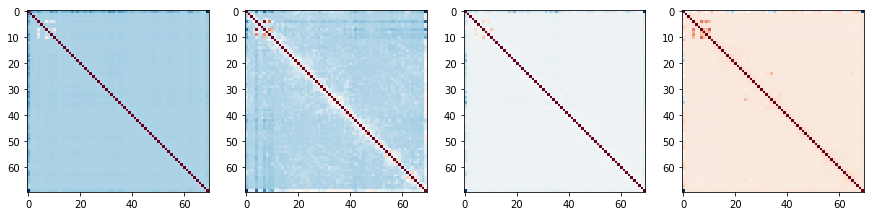

In [213]:
images = [
        log(call4+1)
        , log(mit+1)
        , log(rl+1)
        , log(all+1)
        ]
showImages(images, 1)

Number of columnts: 4


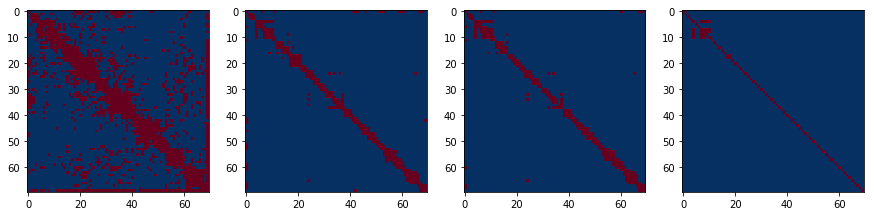

In [212]:
pylab.rcParams['figure.figsize'] = (15, 9)
images = [
        (mit) > 1e-2
        , (all) > 1e-2
        , (rl) > 1e-2
        , (call4) > 1e-2
        ]
showImages(images, 1)

In [10]:
convertBinaryMatToOrcaReadable(call4 > 0, "data/chr%02d_chr%02d_call4.edges"%(chr1, chr1))
convertBinaryMatToOrcaReadable(mit > 0, "data/chr%02d_chr%02d_mit.edges"%(chr1, chr1))
convertBinaryMatToOrcaReadable(rl > 0, "data/chr%02d_chr%02d_rl.edges"%(chr1, chr1))
convertBinaryMatToOrcaReadable(all > 0, "data/chr%02d_chr%02d_all.edges"%(chr1, chr1))